# Lecture 5: Systems of equations & optimization
ENVR 890-010: Python for Environmental Research, Fall 2021

September 24, 2020

By Andrew Hamilton, some material adapted from Greg Characklis, David Gorelick, and H.B. Zeff.

## Summary
Now that we have covered the basics of Python programming (e.g., variable types, data structures, if statements, loops, functions), we can move on to **solving problems** in environmental science, engineering, and public health. The first type of problem we will solve will be **systems of equations and optimization**. 

This will involve a bit of math, but we will try to focus on the programming elements.

## Linear system of equations
Systems of equations appear in many different fields of science and engineering research. The simplest and most common is the linear system of equations. For example, here is a linear system with two equations and two unknowns:

\begin{align}
y + 3 z &= 16 \\
4y - z &= -1
\end{align}

You may remember from algebra that we can solve for $y$ and $z$ using the subtraction method or the substitution method. For larger systems with more equations, it becomes useful to use a little linear algebra, by writing the system in matrix form, $\mathbf{Ax} = \mathbf{b}$.

\begin{align}
\begin{bmatrix}
1 & 3 \\
4 & -1
\end{bmatrix}
\begin{bmatrix}
y \\
z
\end{bmatrix}
&= \begin{bmatrix}
16 \\
-1
\end{bmatrix}
\end{align}

We can then solve for $y$ and $z$ by multiplying each side by $\mathbf{A}^{-1}$.

However, this is not a linear algebra class, so we won't ask you to do that! Luckily, programming languages like Python have convenient packages that greatly simplify solving systems of equations compared to the pencil-and-paper days.

## Example problem 
#### Set up
Linear systems of equations are very common in economics. Economics is often defined as the study of how scarce resources are allocated. Often, the equations dictating this allocation happen to be linear.

Consider a scenario with three rival water sectors: city users, farming users, and industrial users. In this context, "rival" means that the water used by one of the three sectors cannot be used by another. With respect to water, each user's marginal benefits and costs for a single year are known. The marginal benefits tend to decrease as a sector's allocation increases (diminishing marginal utility of water - more water is generally better but at a certain point there is no more benefit to additional water). Marginal costs are assumed flat (the unit cost of treating or transporting water is independent of the amount of water).

Under these conditions, we have the following equations:

\begin{align}
MB_c &= 200 - 3 q_c \\
MC_c &= 50 \\
MB_f &= 100 - q_f \\
MC_f &= 30\\
MB_i &= 150 - 2 q_i \\
MC_i &= 70
\end{align}

where $q_s$ is the allocation of water (in acre-feet) to sector $s \in (c=\text{city}, f=\text{farm}, i=\text{industrial})$.

#### How much water will each sector use if there is unlimited water?

If there is unlimited water, we know that each sector will use enough water until the marginal net benefit of using one more unit of water is zero, meaning $MB_s = MC_s$. Thus, we can write our system of equations as:

\begin{align}
MNB_c &= 150 - 3q_c = 0 \\
MNB_f &= 70 - q_f = 0 \\
MNB_i &= 80 - 2q_i = 0
\end{align}

Because each equation only includes 1 unknown, we can solve for them individually. We find that $q_c = 50$, $q_f = 70$, and $q_i = 40$ acre-feet.

In [1]:
### Check our work by finding intercept graphically
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

In [2]:
### set up params for each sector, (constant, slope).
city = (150, -3)
farm = (70, -1)
indus = (80, -2)

In [3]:
### function for MNB, based on parameter tuple and quantity of water
def get_mnb(params, q):
    return params[0] + params[1] * q
get_mnb(city, 40)

30

In [4]:
### get MNB curve for each sector, over a grid of q points
qs = np.arange(0, 81)
city_q = [get_mnb(city, q) for q in qs]
farm_q = [get_mnb(farm, q) for q in qs]
indus_q = [get_mnb(indus, q) for q in qs]
print(indus_q)

[80, 78, 76, 74, 72, 70, 68, 66, 64, 62, 60, 58, 56, 54, 52, 50, 48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16, 14, 12, 10, 8, 6, 4, 2, 0, -2, -4, -6, -8, -10, -12, -14, -16, -18, -20, -22, -24, -26, -28, -30, -32, -34, -36, -38, -40, -42, -44, -46, -48, -50, -52, -54, -56, -58, -60, -62, -64, -66, -68, -70, -72, -74, -76, -78, -80]


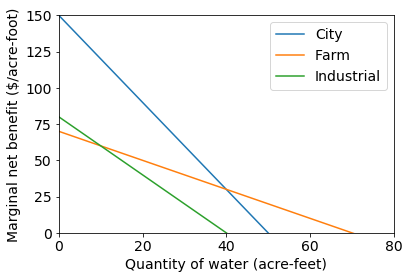

In [5]:
### plot MNB curves
plt.plot(qs, city_q)
plt.plot(qs, farm_q)
plt.plot(qs, indus_q)
plt.xlim([0, 80])
plt.ylim([0, 150])
plt.xlabel('Quantity of water (acre-feet)')
plt.ylabel('Marginal net benefit (\$/acre-foot)')
plt.legend(['City','Farm','Industrial'])

#### What if there are only 100 acre-feet of water available? What is the efficient allocation to each sector?

If water is scarce, the marginal net benefit for each sector will no longer be zero, but we know that they will all be equal to each other. 

\begin{align}
MNB_c &= MNB_f \\
MNB_f &= MNB_i
\end{align}

And for a third equation, we know that the sum of the three usages will be equal to $Q=100$. (It is safe to assume that they will use the entire allotment of 100, since we know that the total usage in the unlimited case was >100 acre-feet). 

Now we can write the system of equations as:

\begin{align}
150 - 3q_c &= 70 - q_f \\
70 - q_f &= 80 - 2q_i \\
q_c + q_f + q_i &\leq 100
\end{align}

Consolidating to put $q$'s on one side and constants on the other,

\begin{align}
3 q_c - 1 q_f + 0 q_i &= 80 \\
0 q_c - 1 q_f + 2 q_i &= 10 \\
1 q_c + 1 q_f + 1 q_i &= 100
\end{align}

Rewriting this in the $\mathbf{Ax}=\mathbf{b}$ form,

\begin{align}
\begin{bmatrix}
3 & -1 & 0 \\
0 & -1 & 2 \\
1 & 1 & 1
\end{bmatrix}
\begin{bmatrix}
q_c \\
q_f \\
q_i
\end{bmatrix}
&= \begin{bmatrix}
80 \\
10 \\
100
\end{bmatrix}
\end{align}

Now as we mentioned previously, we could solve this on paper using a bit of linear algebra. However, once we have it in this form we can also **solve the system of equations using NumPy's ``linalg`` module**.

In [6]:
### solve simple lin sys eqns with numpy
A = np.array([[3, -1, 0], [0, -1, 2], [1, 1, 1]])
print(A)

[[ 3 -1  0]
 [ 0 -1  2]
 [ 1  1  1]]


In [7]:
b = np.array([80, 10, 100])
print(b)

[ 80  10 100]


In [8]:
x = np.linalg.solve(A, b)
x
print(x.sum())
print(np.sum(x))

99.99999999999999
99.99999999999999


We find that in the limited water case, $q_c = 39.1$, $q_f = 37.3$, and $q_i = 23.6$ acre-feet. As expected, each sector uses less water than they did when water was unlimited. 

To check our work, we can make sure that all sectors have equivalent MNB:

In [9]:
print( f'City MNB: ${round(get_mnb(city, x[0]), 1)}/acre-foot')
print( f'Farm MNB: ${round(get_mnb(farm, x[1]), 1)}/acre-foot')
print( f'Industrial MNB: ${round(get_mnb(indus, x[2]), 1)}/acre-foot')

City MNB: $32.7/acre-foot
Farm MNB: $32.7/acre-foot
Industrial MNB: $32.7/acre-foot


## Non-linear systems of equations
So far, we have dealt only with systems of equations where all equations are linear (i.e., we don't have any $q_c^2$, $q_c*q_f$, etc.) However, non-linear systems are common in many lines of research, and require different solution methods. These are typically numerical techniques as opposed to linear algebraic manipulations. However, we will not go into the details beyond their implementation in Python.

#### What if the MNB curves are non-linear?

In our last example, the three sectors were assumed to have linear marginal net benefits curves. However, supply and demand curves are often non-linear (e.g., Cobb-Douglas elasticity). 

For example, consider a different region with 2000 acre-feet of water to be allocated among five water-using sectors, which are assumed to have the following non-linear marginal net benefits functions:

\begin{align}
MNB_a &= 3000 - 85 q_a \\
MNB_b &= 7500 - 50 q_b \\
MNB_c &= 5000 - 6 q_c^2 \\
MNB_d &= 1000 - 150 q_d^{1/8} \\
MNB_e &= 3000 - 40 q_e
\end{align}

Using a similar technique from before, we can write five equations for the five unknowns:

\begin{align}
3000 - 85 q_a &= 7500 - 50 q_b \\
7500 - 50 q_b &= 5000 - 6 q_c^2 \\
5000 - 6 q_c^2 &= 1000 - 150 q_d^{1/8} \\
1000 - 150 q_d^{1/8} &= 3000 - 40 q_e\\
q_a + q_b + q_c + q_d + q_e &\leq 2000
\end{align}

And then write this again with unknowns on the left and constants on the right (and after assuming again that the 2000 acre-foot constraint will be **binding** ("$=$" rather than "$\leq$").

\begin{align}
-85 q_a + 50 q_b + 0 q_c + 0 q_d + 0 q_e &= 4500 \\
0 q_a - 50 q_b + 6 q_c^2 + 0 q_d + 0 q_e &= -2500 \\
0 q_a + 0 q_b - 6 q_c^2 + 150 q_d^{1/8} + 0 q_e &= -4000 \\
0 q_a + 0 q_b + 0 q_c - 150 q_d^{1/8} + 40 q_e &= 2000 \\
1 q_a + 1 q_b + 1 q_c + 1 q_d + 1 q_e &= 2000 \\
\end{align}

\begin{align}
-85 q_a + 50 q_b + 0 q_c + 0 q_d + 0 q_e -4500 &= 0 \\
0 q_a - 50 q_b + 6 q_c^2 + 0 q_d + 0 q_e +2500 &= 0 \\
0 q_a + 0 q_b - 6 q_c^2 + 150 q_d^{1/8} + 0 q_e +4000 &= 0 \\
0 q_a + 0 q_b + 0 q_c - 150 q_d^{1/8} + 40 q_e -2000 &= 0 \\
1 q_a + 1 q_b + 1 q_c + 1 q_d + 1 q_e - 2000&= 0 \\
\end{align}

Because these are **non-linear equations**, we can't solve them through the ``numpy.linalg`` solution method. Instead, we will use ``scipy``, a popular package for scientific computing. We will use the ``optimize`` and ``integrate`` modules today, but there are many other useful modules for statistics, interpolation, signal processing, etc. See [the documentation](https://docs.scipy.org/doc/scipy/reference/index.html) for more.

In [10]:
### import "root" function, which finds the roots of multivariate functions
from scipy.optimize import root 

In [11]:
### Define our system of equations as a function. Input q is 5-dimensional array of allocations, [q_a, q_b, q_c, q_d, q_e].
### The output, eq, is a 5-dimensional array that should be [0., 0., 0., 0., 0.] if q is a root.
def soe(q):
    eq = np.zeros(5)
    eq[0] = -85 * q[0] + 50 * q[1] - 4500
    eq[1] = -50 * q[1] + 6 * q[2] ** 2 + 2500
    eq[2] = -6 * q[2] ** 2 + 150 * q[3] ** (1/8) + 4000
    eq[3] = -150 * q[3] ** (1/8) + 40 * q[4] - 2000
    eq[4] = q.sum() - 2000
    return eq

In [12]:
### Supply initial guess along with our soe function, and then find root
guess = np.array([402., 401., 400., 399., 398.])
sol = root(soe, guess)

print(sol)
print()

    fjac: array([[-9.99913493e-01, -4.16012810e-03,  4.16111615e-03,
        -9.87963251e-07,  1.17636882e-02],
       [-4.55976457e-03,  9.99466226e-01, -7.55716083e-03,
         1.78009404e-06, -3.14541120e-02],
       [ 3.71886096e-03,  6.46844625e-03,  9.99355686e-01,
         2.25330506e-04, -3.51068508e-02],
       [ 1.17064929e-02,  3.15962827e-02,  3.46909910e-02,
        -9.86507028e-02,  9.93946280e-01],
       [-1.15868799e-03, -3.12901775e-03, -3.21279459e-03,
        -9.95122097e-01, -9.85421564e-02]])
     fun: array([-1.81898940e-12,  3.57431418e-10, -3.56976670e-10, -2.27373675e-13,
        0.00000000e+00])
 message: 'The solution converged.'
    nfev: 17
     qtf: array([-5.03032211e-07,  6.08758823e-05, -6.00214018e-05, -1.87088257e-07,
        4.99675859e-09])
       r: array([ 8.50073537e+01, -4.97744583e+01, -2.68632123e+00,  1.21752797e-02,
        1.23189483e-02, -5.04077561e+01,  3.26522079e+02, -3.19735677e-02,
       -1.03353772e-01, -3.21933264e+02,  6.392838

In [13]:
q_allocation = sol['x']
print(q_allocation)

q_allocation.sum()

[  28.01669717  137.62838519   27.02288925 1747.7965469    59.53548149]


2000.0

We find for this system that sector $d$ uses the vast majority of the water, at 1747.8 out of 2000 acre-feet.

## Constrained optimization
#### What if the government caps sector $d$ at 1500 acre-feet? How much will the others use?

We now have two **constraints** that our solution must meet:

\begin{align}
q_a + q_b + q_c + q_d + q_e &\leq 2000 \\
q_d &\leq 1500 
\end{align}

In the previous solutions, we assumed that the first constraint was **binding** and replaced the "$\leq$" with "$=$". This was ok because we can verify that in the absense of the constraint, the total use will be greater than 2000. However, as we add more constraints, it becomes more likely that we might falsely apply equivalence to a **non-binding** constraint. 

With the current example, once we apply the second constraint to sector $d$, the first constraint becomes non-binding, which means that the total use is actually less than 2000. If we make the first constraint binding, then we will accidentally force users to use a sub-optimal amount. 

Fortunately, there is a better way to solve multi-constraint problems, using **constrained optimization**. 

To do this, we will write an **equivalent formulation** of the problem. Rather than setting the marginal net benefits functions equal to each other and solving the system of equations, we can **maximize the net benefits**. If you are taking ENVR 755, this should make sense. If not, you may just have to trust me. The net benefits function is the integral of the marginal net benefits function (in fact, MNB is really defined as the derivative of NB). 

Thus, we want to find the solution $\mathbf{q}$ that maximizes the following quantity:

$$NB = \sum_{s=a}^e \left(\int_0^{q_s} MNB_s dq\right)$$

subject to the two constraints above.

Thus, we need to integrate each of the marginal net benefits functions (if you don't remember how to do this, don't worry - we will see how to integrate automatically with Scipy later on):

\begin{align}
NB_a &= \int_0^{q_a} 3000 - 85 q_a dq_a = 3000 q_a - \frac{85}{2} q_a^2\\
NB_b &= \int_0^{q_b} 7500 - 50 q_b dq_b = 7500 q_b - 25 q_b^2 \\
NB_c &= \int_0^{q_c} 5000 - 6 q_c^2 dq_c = 5000 q_c - 2 q_c^3 \\
NB_d &= \int_0^{q_d} 1000 - 150 q_d^{1/8} dq_d = 1000 q_d - \frac{400}{3} q_d^{9/8} \\
NB_e &= \int_0^{q_e} 3000 - 40 q_e dq_e = 3000 q_e - 20 q_e^2
\end{align}

The first step to constrained optimization with Scipy, as with the root finder above, is to write a function for the total net benefits. We multiply it by -1 since the optimization function likes to minimize, rather than maximize.

In [14]:
## write function for minus total net benefits. We make it negative since optimizer likes to minimize, not maximize.
def MinusNetBenefits(q):
    nb = np.zeros(5)
    nb[0] = 3000 * q[0] - 85/2 * q[0] ** 2
    nb[1] = 7500 * q[1] - 50/2 * q[1] ** 2
    nb[2] = 5000 * q[2] - 6/3 * q[2] ** 3
    nb[3] = 1000 * q[3] - 150*8/9 * q[3] ** (9/8)
    nb[4] = 3000 * q[4] - 40/2 * q[4] ** 2
    return -nb.sum()

Let's first do the optimization without the constraint on sector $d$, to make sure we get the same answer as our rootfinder method above.

In [15]:
## import minimize function, along with Bounds and LinearConstraint classes
from scipy.optimize import Bounds, LinearConstraint, minimize

## Set bounds for each q variable
bounds = Bounds([0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf])

## set other linear constraints. THis is how we write "0 <= q_a + q_b + q_c + q_d + q_e <= 2000"
linear_constraint = LinearConstraint([1, 1, 1, 1, 1], 0, 2000)

In [16]:
sol_min = minimize(MinusNetBenefits, np.array([400, 300, 500, 600, 500]), bounds=bounds, constraints=linear_constraint, method='trust-constr')
print(sol_min)
print()

 barrier_parameter: 2.048000000000001e-09
 barrier_tolerance: 2.048000000000001e-09
          cg_niter: 250
      cg_stop_cond: 4
            constr: [array([1999.99999995]), array([  28.01669684,  137.62838412,   27.02288929, 1747.79654717,
         59.53548253])]
       constr_nfev: [0, 0]
       constr_nhev: [0, 0]
       constr_njev: [0, 0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 0.21145915985107422
               fun: -1967953.8922103962
              grad: array([-618.58090528, -618.58072714, -618.58034101, -618.58073723,
       -618.58069358])
               jac: [array([[1, 1, 1, 1, 1]]), array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])]
   lagrangian_grad: array([-2.24115226e-04, -4.62540349e-05,  3.39412251e-04, -5.63454548e-05,
       -1.26975376e-05])
           message: '`xtol` termination condition is satisfied.'
            method: 'tr_interior_poi

C:\Users\rcuppari\AppData\Local\Continuum\miniconda3\envs\py36\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


In [17]:
print(sol_min['x'] - q_allocation)
print(sol_min)

[-3.35588989e-07 -1.07144757e-06  4.79362612e-08  2.62890808e-07
  1.04447840e-06]
 barrier_parameter: 2.048000000000001e-09
 barrier_tolerance: 2.048000000000001e-09
          cg_niter: 250
      cg_stop_cond: 4
            constr: [array([1999.99999995]), array([  28.01669684,  137.62838412,   27.02288929, 1747.79654717,
         59.53548253])]
       constr_nfev: [0, 0]
       constr_nhev: [0, 0]
       constr_njev: [0, 0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 0.21145915985107422
               fun: -1967953.8922103962
              grad: array([-618.58090528, -618.58072714, -618.58034101, -618.58073723,
       -618.58069358])
               jac: [array([[1, 1, 1, 1, 1]]), array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])]
   lagrangian_grad: array([-2.24115226e-04, -4.62540349e-05,  3.39412251e-04, -5.63454548e-05,
       -1.26975376e-05])
           message

In [18]:
sol_min.x.sum()

1999.9999999482689

In [19]:
q_allocation = sol_min.x
print(q_allocation)
print()

print(q_allocation.sum())

[  28.01669684  137.62838412   27.02288929 1747.79654717   59.53548253]

1999.9999999482689


We get the same answers as before - good. Now let's adjust our formulation to include the constraint that $q_d \leq 1500$.

In [20]:
bounds = Bounds([0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, 1500, np.inf])
linear_constraint = LinearConstraint([1, 1, 1, 1, 1], 0, 2000)

sol_min = minimize(MinusNetBenefits, np.array([120, 125, 134, 1500, 101]), bounds=bounds, constraints=linear_constraint, method='trust-constr')
print(sol_min)
print()

q_allocation = sol_min.x
print(q_allocation)
print()

print(q_allocation.sum())

 barrier_parameter: 2.048000000000001e-09
 barrier_tolerance: 2.048000000000001e-09
          cg_niter: 187
      cg_stop_cond: 2
            constr: [array([1789.16162866]), array([  35.29411688,  149.9999991 ,   28.86751403, 1500.        ,
         74.99999866])]
       constr_nfev: [0, 0]
       constr_nhev: [0, 0]
       constr_njev: [0, 0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 0.1925523281097412
               fun: -1825234.1709352047
              grad: array([ 0.00000000e+00,  0.00000000e+00,  5.41265865e-04, -6.25800958e+02,
        0.00000000e+00])
               jac: [array([[1, 1, 1, 1, 1]]), array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])]
   lagrangian_grad: array([-1.23688796e-08, -1.23338875e-08,  5.40604747e-04, -1.13686838e-13,
       -1.23458942e-08])
           message: '`xtol` termination condition is satisfied.'
            method: 'tr_int

Notice that the total water consumed, 1789.2 acre-feet, is less than 2000. Thus, if we had assumed that the constraint was binding and solved using the system of equations method, we would have gotten the wrong answer because we "forced" everyone to use more water than they wanted.

## Numerical integration
Fortunately, it is straightforward to integrate numerically using ``Scipy``, so that you don't have to do the integration by hand like we did above. We will use the ``quad`` function from the ``integrate`` module.

In [21]:
## use scipy integration
## constrained optimization approach
from scipy.integrate import quad 

In [22]:
## First, write each marginal net benefits as its own function
def mnb_a(x): 
    return 3000 - 85 * x
def mnb_b(x): 
    return 1500 * 5 - 50 * x
def mnb_c(x): 
    return 500 * 10 - 6 * x ** 2
def mnb_d(x): 
    return 1000 - 150 * x ** (1/8)
def mnb_e(x): 
    return 3000 - 40 * x

In [23]:
## Now write the net benefits as the integral of mnb function
def nb_s(fn, x): 
    return quad(fn, 0, x)[0]

In [24]:
def MinusNetBenefits_integrate(q):
    nb = np.zeros(5)
    nb[0] = nb_s(mnb_a, q[0])
    nb[1] = nb_s(mnb_b, q[1])
    nb[2] = nb_s(mnb_c, q[2])
    nb[3] = nb_s(mnb_d, q[3])
    nb[4] = nb_s(mnb_e, q[4])
    return -nb.sum()

In [25]:
sol_min = minimize(MinusNetBenefits_integrate, np.array([120, 125, 134, 1500, 101]), bounds=bounds, constraints=linear_constraint, method='trust-constr')
print(sol_min)
print(sol_min.x.sum())
x = sol_min.x

 barrier_parameter: 2.048000000000001e-09
 barrier_tolerance: 2.048000000000001e-09
          cg_niter: 185
      cg_stop_cond: 2
            constr: [array([1789.16162357]), array([  35.29411566,  149.99999848,   28.86751161, 1499.99999995,
         74.99999787])]
       constr_nfev: [0, 0]
       constr_nhev: [0, 0]
       constr_njev: [0, 0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 0.19576692581176758
               fun: -1825234.170904484
              grad: array([ 0.00000000e+00,  0.00000000e+00, -5.41265914e-04, -6.25800958e+02,
        0.00000000e+00])
               jac: [array([[1, 1, 1, 1, 1]]), array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])]
   lagrangian_grad: array([ 1.22700502e-08,  1.23237261e-08, -5.40604921e-04, -1.36424205e-12,
        1.23084321e-08])
           message: '`xtol` termination condition is satisfied.'
            method: 'tr_int

As we had hoped, we get the same answer as when we integrated by hand (up to the fourth digit behind the decimal). If precision is important, you can adjust the error tolerance for both the integration and the optimization - see documentation for details.